In [135]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,roc_curve,auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

1) Reading the data :

In [136]:
df = pd.read_csv(r"E:\College\Machine Learning\Project\data.csv",index_col=0)
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


2) Splitting features and target :

In [137]:
X = df.drop(['result'],axis=1)
y = df['result']
print(X.shape)
print(y.shape)

(863, 13)
(863,)


3. Splitting into training and testing :

In [138]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(690, 13)
(173, 13)


4) Using cross validation to get the optimal hyper parameter (k) :

Optimal value of k is 5 with an f1 score of 0.6769442710861474


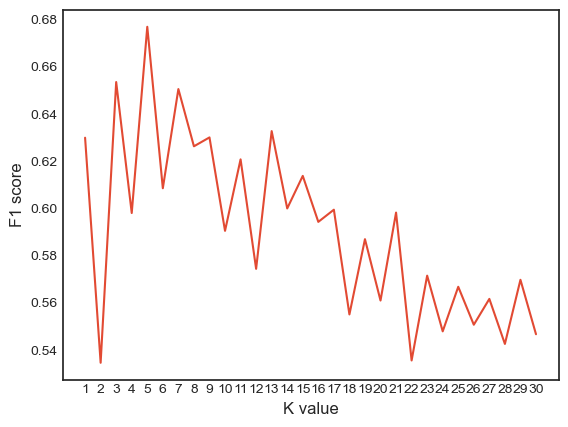

In [139]:
scores = []
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors= k)
    foldsScores = cross_val_score(knn,X,y,cv = 10,scoring='f1')
    scores.append(foldsScores.mean())

best_f1 = max(scores)
optimal_k = scores.index(best_f1)+1
print("Optimal value of k is {} with an f1 score of {}".format(optimal_k, best_f1))
plt.plot(range(1,31),scores)
plt.xlabel("K value")
plt.ylabel("F1 score")
plt.xticks(np.arange(1,31))
plt.show()

5) Training and testing the model with the optimal k :

In [140]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

6) Evaluating performance using precion and recall and F1 score :

In [141]:
print("Precision is : {}".format(precision_score(y_test,y_pred)))
print("Recall is : {}".format(recall_score(y_test,y_pred)))
print("F1-score is : {}".format(f1_score(y_test,y_pred)))

Precision is : 0.7916666666666666
Recall is : 0.6785714285714286
F1-score is : 0.7307692307692307


7) Evaluating performance using ROC curve and AUC :

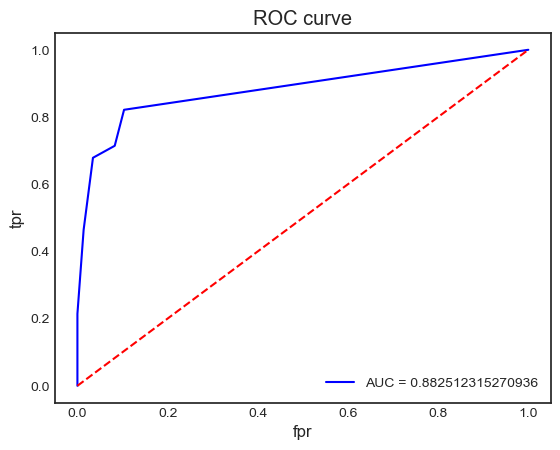

In [142]:
y_scores = knn.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
plt.title('ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc = 'lower right')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()